# Quick look at party size snapshots

I combined data from the SOTS site here...

https://portal.ct.gov/SOTS/Election-Services/Statistics-and-Data/Statistics-and-Data

...plus a snapshot from around the end of June 2018, to get a rough sense of how the party sizes have changed.

### Limitations of these data

I was asked by colleague to see whether any party is pulling ahead in terms of adding voters, but these single point in time snapshots of party size don't get at how many people are registering. They show that overall these numbers increase in presidential years and d


In [39]:
import pandas as pd

In [40]:
df = pd.read_csv(
    "data/Voter registration - Sheet2.csv",
    header=[0,1]
)

df.head()

,Unnamed: 0_level_0,Republican Party,Unnamed: 2_level_0,Unnamed: 3_level_0,Democratic Party,Unnamed: 5_level_0,Unnamed: 6_level_0,Minor Parties,Unnamed: 8_level_0,Unnamed: 9_level_0,Unaffiliated,Unnamed: 11_level_0,Unnamed: 12_level_0,Totals,Unnamed: 14_level_0,Unnamed: 15_level_0
,Year,Active,Inactive,Total,Active,Inactive,Total,Active,Inactive,Total,Active,Inactive,Total,Active,Inactive,Totals
0,2018 YTD,"446,265",NaN,NaN,"760,672",NaN,NaN,NaN,NaN,NaN,"857,111",NaN,NaN,NaN,NaN,NaN
1,2017,"453,625","27,711","481,336","771,412","77,081","848,493","29,668","2,291","31,959","861,766","94,697","956,463","2,116,471","201,780","2,318,251"
2,2016,"467,687","24,537","492,224","810,136","59,705","869,841","28,050","1,582","29,632","881,476","84,560","966,036","2,187,349","170,384","2,357,733"
3,2015,"400,216","29,085","429,301","703,851","73,035","776,886","20,610","1,883","22,493","798,426","102,273","900,699","1,923,103","206,276","2,129,379"
4,2014,"407,519","27,189","434,708","712,925","72,962","785,887","20,168","1,638","21,806","818,381","97,576","915,957","1,958,993","199,365","2,158,358"


/Users/jakekara/Library/Python/2.7/lib/python/site-packages/pandas/plotting/_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


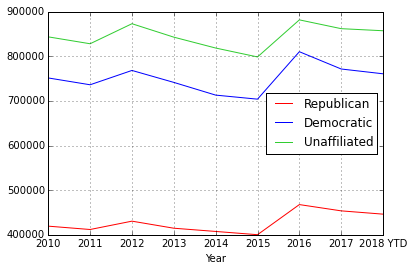

In [41]:
actives = df[["Unnamed: 0_level_0","Republican Party","Democratic Party","Unaffiliated"]]
actives.columns = ["Year","Republican","Democratic","Unaffiliated"]
actives = actives.set_index("Year").sort_index()
for col in actives.columns.tolist():
    actives[col] = pd.to_numeric(actives[col].apply(lambda x: str(x).replace(",","").strip()),errors=coerce)
%matplotlib inline

colors = ["red","blue","limegreen"]

ax = actives.plot(grid=True,colors=colors)


### How do they fall off their peaks?

We can see a slight pattern of voter registration dropping from its presidential year peaks. Let's see how 2018 fall-off compares with 2014 fall-off, both midterm years.

Looks like Unaffiliated has held much more of its peak compared with Republicans and democrats, but those two parties' fall-off is about the same-ish (very scientific term here). 

To get a better sense of what's going on, we should look specifically at registrations, which I do in the other sheet in this repository.

In [42]:
actives.loc["2018 YTD"].transpose() / actives.loc["2016"]

Republican      0.954196
Democratic      0.938944
Unaffiliated    0.972359
dtype: float64

In [43]:
actives.loc["2014"].transpose() / actives.loc["2012"]

Republican      0.946477
Democratic      0.928075
Unaffiliated    0.937608
dtype: float64

In [44]:
actives[actives.index.map(lambda x: x in ["2010", "2014", "2018 YTD"])]

,Republican,Democratic,Unaffiliated
Year,,,
2010,419353,751360,843399
2014,407519,712925,818381
2018 YTD,446265,760672,857111


In [45]:
actives.loc["2012"]

Republican      430564
Democratic      768176
Unaffiliated    872839
Name: 2012, dtype: int64